<a href="https://colab.research.google.com/github/FelixEbenezer/AmazonSageMakerCourse/blob/master/TestQuant_FelixNganga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PRE TRAITEMENT DE DONNÉES AVEC PANDAS ET SKLEARN

# Import de bibliothéques

In [45]:
import pandas as pd
import numpy as np
#from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
#drive.mount('/content/drive')

# Analyse Exploratoire et descriptive

In [47]:
candidat_df = pd.read_csv('/content/data_v1.0.csv')
candidat_df

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [48]:
candidat_df.drop(["Unnamed: 0", "index"], axis=1, inplace= True)
candidat_df.head(2)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0


In [49]:
candidat_df.shape, candidat_df.columns

((20000, 11),
 Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
        'specialite', 'note', 'dispo', 'embauche'],
       dtype='object'))

In [50]:
candidat_df.describe()

,age,exp,salaire,note,embauche
count,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000
mean,35.004521,9.500352,34974.343934,75.168762,0.114600
std,9.609169,3.012109,5003.099616,17.095926,0.318547
min,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,29.000000,7.000000,31596.000000,63.720000,0.000000
50%,35.000000,9.000000,34979.000000,75.080000,0.000000
75%,41.000000,12.000000,38358.000000,86.617500,0.000000
max,74.000000,23.000000,53977.000000,143.220000,1.000000


In [51]:
candidat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19897 non-null  object 
 2   age         19909 non-null  float64
 3   exp         19904 non-null  float64
 4   salaire     19905 non-null  float64
 5   sexe        19900 non-null  object 
 6   diplome     19890 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [52]:
candidat_df.describe(include=object)

,date,cheveux,sexe,diplome,specialite,dispo
count,19909,19897,19900,19890,19907,19894
unique,1826,4,2,4,4,2
top,2012-02-03,chatain,M,master,geologie,non
freq,24,6022,11889,7513,10028,11848


In [53]:
np.unique(candidat_df['embauche'], return_counts=True)

(array([0, 1]), array([17708,  2292]))

# Traitement de valeurs inconsistentes ou outliers

In [54]:
candidat_df.loc[candidat_df['age'] < 18]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
44,2014-12-11,brun,16.0,7.0,29858.0,M,master,geologie,76.18,non,0
112,2010-12-09,brun,14.0,13.0,34851.0,F,master,forage,74.46,non,0
164,2011-02-18,brun,10.0,9.0,38767.0,F,master,archeologie,89.16,oui,0
190,2011-10-16,chatain,16.0,9.0,38461.0,F,licence,detective,74.70,non,0
194,2010-06-15,brun,17.0,7.0,37927.0,M,licence,geologie,65.19,oui,0
...,...,...,...,...,...,...,...,...,...,...,...
19910,2012-04-14,brun,13.0,9.0,35383.0,M,doctorat,forage,90.35,oui,0
19912,2011-05-11,chatain,17.0,3.0,33723.0,F,doctorat,archeologie,97.09,oui,0
19921,2011-09-02,chatain,16.0,7.0,39557.0,M,master,detective,61.87,oui,0
19930,2012-07-02,blond,17.0,4.0,36613.0,M,licence,geologie,64.39,non,0


In [55]:
candidat_df.loc[candidat_df['age'] < 0]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
1842,2012-02-25,blond,-1.0,6.0,38176.0,M,bac,detective,44.88,non,0
3968,2011-12-08,brun,-3.0,11.0,26167.0,M,doctorat,forage,121.74,oui,0
19605,2012-12-11,chatain,-2.0,12.0,27837.0,M,doctorat,geologie,90.50,oui,0


In [56]:
candidat_df.loc[candidat_df['exp'] < 0]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
6025,2013-05-06,blond,36.0,-1.0,29241.0,M,master,geologie,85.34,non,0
11284,2013-08-05,chatain,34.0,-2.0,51294.0,M,licence,detective,38.40,oui,0


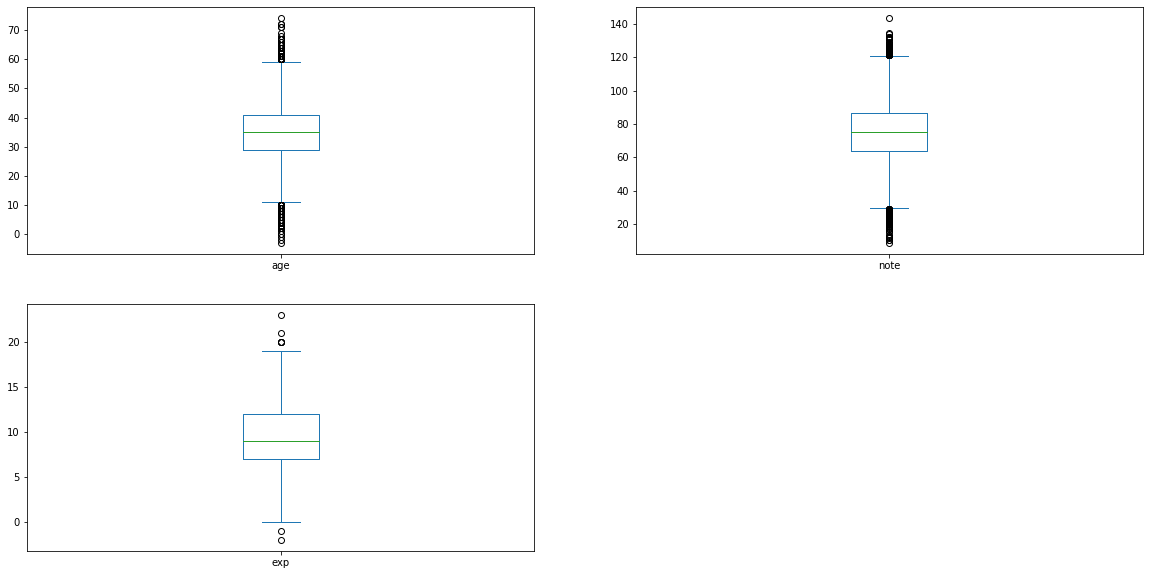

In [57]:
#On peut d´ailleurs visualiser ces outliers atravers de graphiques ci après:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
candidat_df["age"].plot.box()
plt.subplot(2,2,2)
candidat_df["note"].plot.box()
plt.subplot(2,2,3)
candidat_df["exp"].plot.box()


In [58]:
candidat_df.loc[candidat_df.age<18,'age'] = candidat_df.age.mean()

candidat_df.loc[candidat_df.exp<0,'exp'] = candidat_df.exp.mean()

# Traitement de valeurs manquantes

In [59]:
candidat_df.isnull().sum()

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [60]:
#Il existe plusieurs façon de traiter ces NaN, ou je les élimine tous si leur % est négligeable, ou je les remplace par mean ou median 
#selon le besoin

In [61]:
#Je calcule le % de ces NaN
print('Nans Percentage :\n')
for col in list(candidat_df):
    nbr = candidat_df[col].isna().sum()
    if nbr != 0:
        print("{} : {} ==> {:.2f} %".format(col,candidat_df[col].isna().sum(),100.0*candidat_df[col].isna().sum()/candidat_df[col].shape[0]))

Nans Percentage :

date : 91 ==> 0.46 %
cheveux : 103 ==> 0.52 %
age : 91 ==> 0.46 %
exp : 96 ==> 0.48 %
salaire : 95 ==> 0.47 %
sexe : 100 ==> 0.50 %
diplome : 110 ==> 0.55 %
specialite : 93 ==> 0.47 %
note : 114 ==> 0.57 %
dispo : 106 ==> 0.53 %


In [62]:
#Ça represente moins de 2% du dataset total, je choisis pour le moment de les éliminer, mais quand je vais vouloir faire des améliorations
#j´aimera bien choisir l autre option (Mean ou Median)
candidat_df.dropna(inplace=True)

In [63]:
candidat_df.duplicated().sum()

0

# Les valeurs catégorielles

In [64]:
print('Values : \n')
for i in list(candidat_df):
    print(i + ': ' + str(candidat_df[i].unique()), end="\n\n")

Values : 

date: ['2012-06-02' '2011-04-21' '2012-09-07' ... '2010-04-21' '2011-03-04'
 '2011-07-11']

cheveux: ['roux' 'blond' 'chatain' 'brun']

age: [25.         35.         29.         37.         33.         31.
 43.         28.         50.         44.         39.         23.
 38.         30.         42.         27.         19.         40.
 49.         26.         59.         41.         34.         24.
 35.00452057 36.         48.         47.         53.         20.
 22.         54.         46.         45.         61.         56.
 32.         55.         52.         65.         51.         21.
 57.         62.         18.         58.         67.         63.
 69.         64.         60.         72.         66.         71.
 68.        ]

exp: [ 9.         13.          6.          8.         12.         10.
 11.          4.         14.          3.          7.         15.
  5.          2.         17.          0.         16.          1.
 21.         18.         19.         20.        

# Visualisation de données

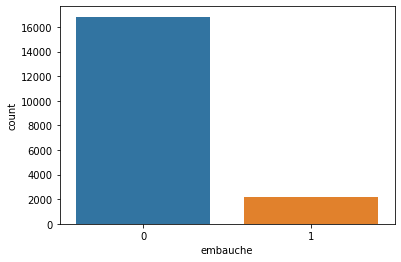

In [65]:
sns.countplot(x = candidat_df['embauche']);

In [66]:
# On remarque qu'on a un dataset déséquilibré.

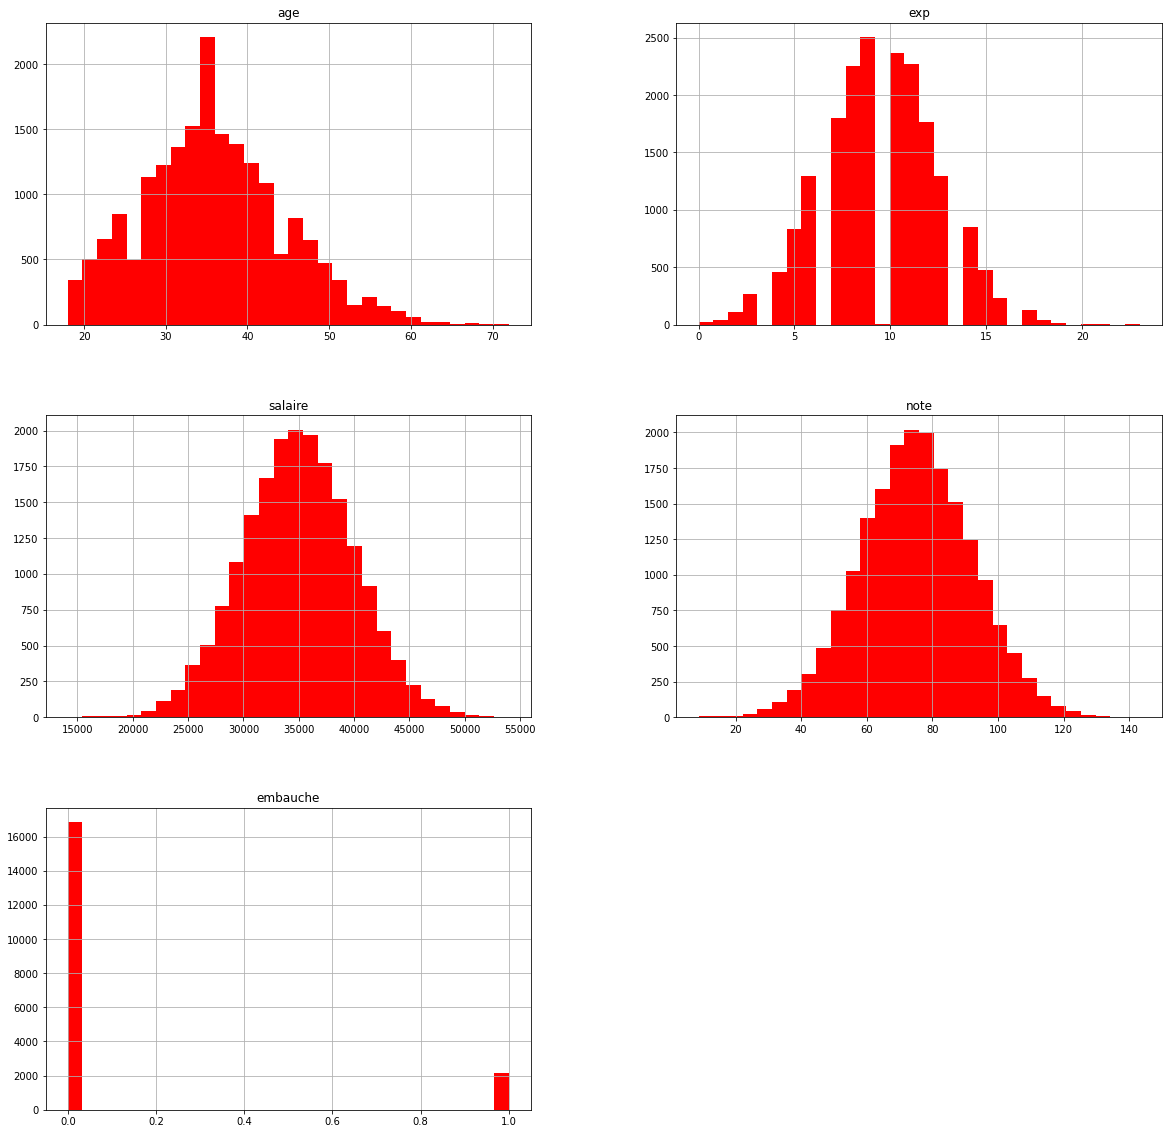

In [67]:
candidat_df.hist(bins=30, figsize=(20,20), color='r'); 

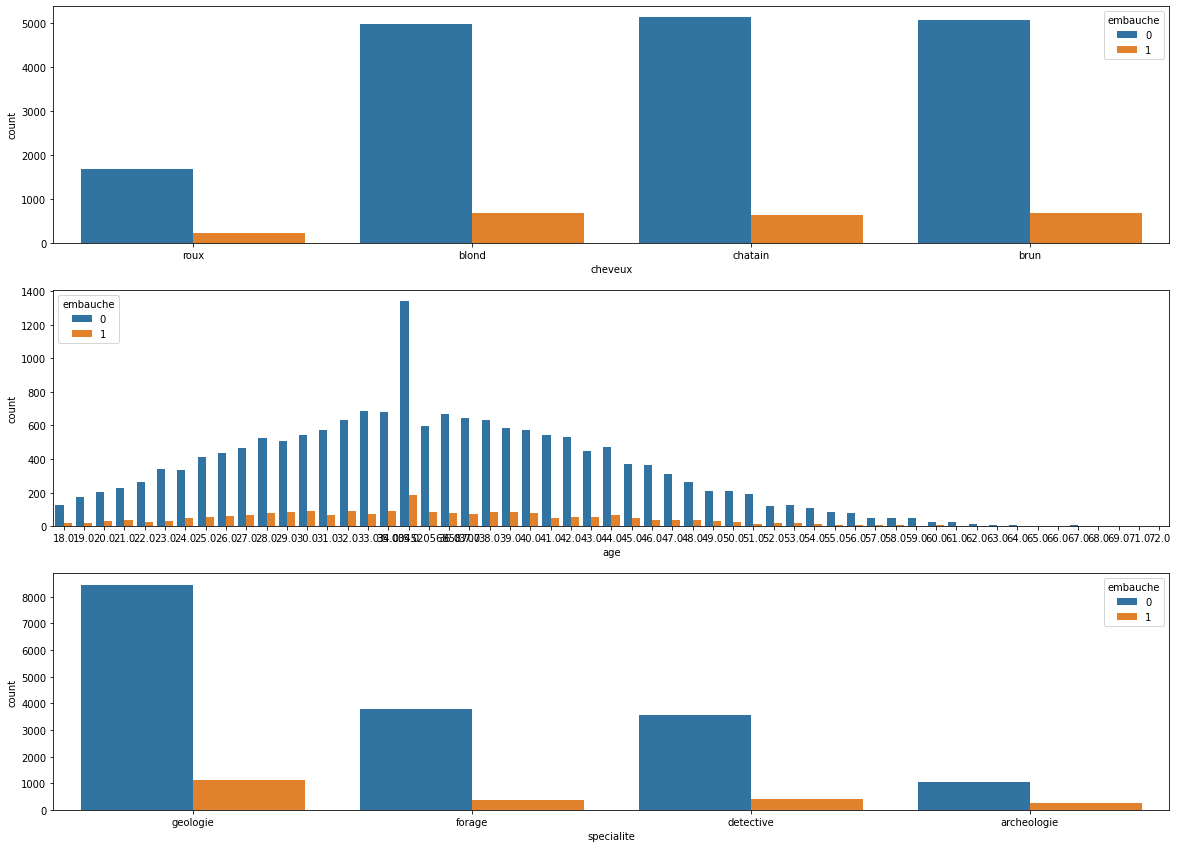

In [68]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'cheveux', hue = 'embauche', data = candidat_df)
plt.subplot(412)
sns.countplot(x = 'age', hue = 'embauche', data = candidat_df)
plt.subplot(413)
sns.countplot(x = 'specialite', hue = 'embauche', data = candidat_df)

In [69]:
grafico = px.scatter_matrix(candidat_df, dimensions=['age', 'cheveux', 'specialite'], color = 'embauche')
grafico.show()

# Analyse de la colonne Date d´embauche

In [70]:
#Je le convertis en DateTime pour mieux le traiter comme une date
candidat_df.date = pd.to_datetime(candidat_df.date)

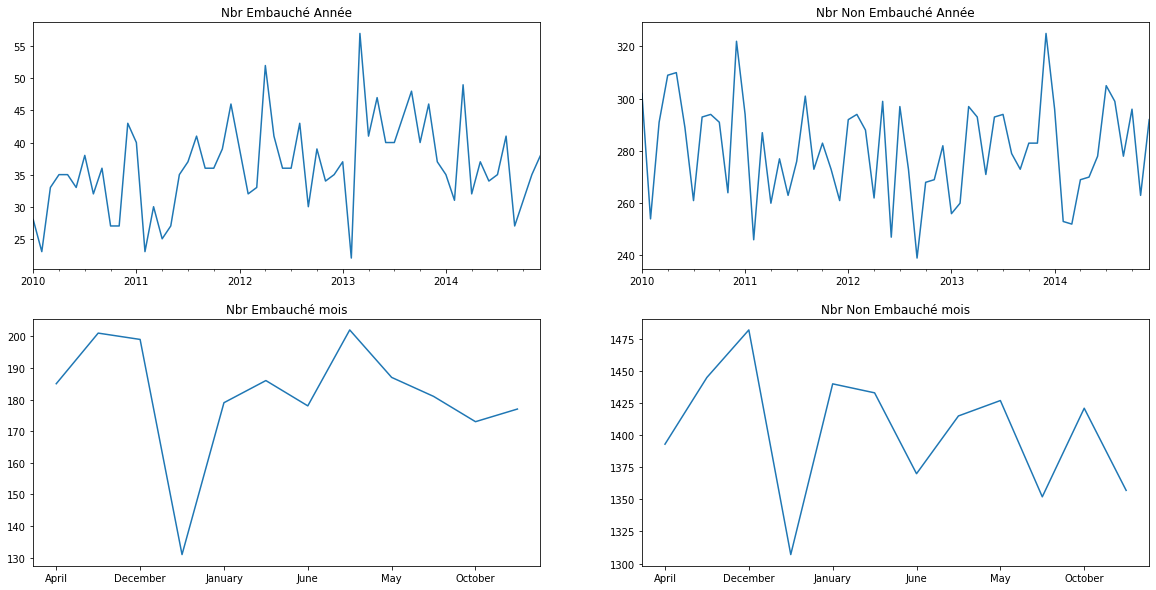

In [71]:
# ici je fais une analyse graphique de la date pour voir si ca y ressort une tendance ou sainonnalité d´embauche ou pas
#en comparant ces embauches par année et par mois 
date_1 = candidat_df[candidat_df.embauche==1].date.dt.month_name().value_counts()
date_0 = candidat_df[candidat_df.embauche==0].date.dt.month_name().value_counts()
date_0_y = candidat_df[candidat_df.embauche==0].date.dt.to_period('M').value_counts()
date_1_y = candidat_df[candidat_df.embauche==1].date.dt.to_period('M').value_counts()

date_1_y = date_1_y.sort_index()
date_0_y = date_0_y.sort_index()
date_1 = date_1.sort_index()
date_0 = date_0.sort_index()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.title("Nbr Embauché Année")
date_1_y.plot()
plt.subplot(2,2,2)
plt.title("Nbr Non Embauché Année")
date_0_y.plot()
plt.subplot(2,2,3)
plt.title("Nbr Embauché mois")
date_1.plot()
plt.subplot(2,2,4)
plt.title("Nbr Non Embauché mois")
date_0.plot()

In [72]:
# On remarque une saisonalité sur le nombre de recrutement (Elevé au début et fin de l´année) et pareil pour le mois, du coup je prefere
#considére le mois que l´année pour la continuation de mon traitement

# Les corrélations

In [73]:
correlations = candidat_df.corr()

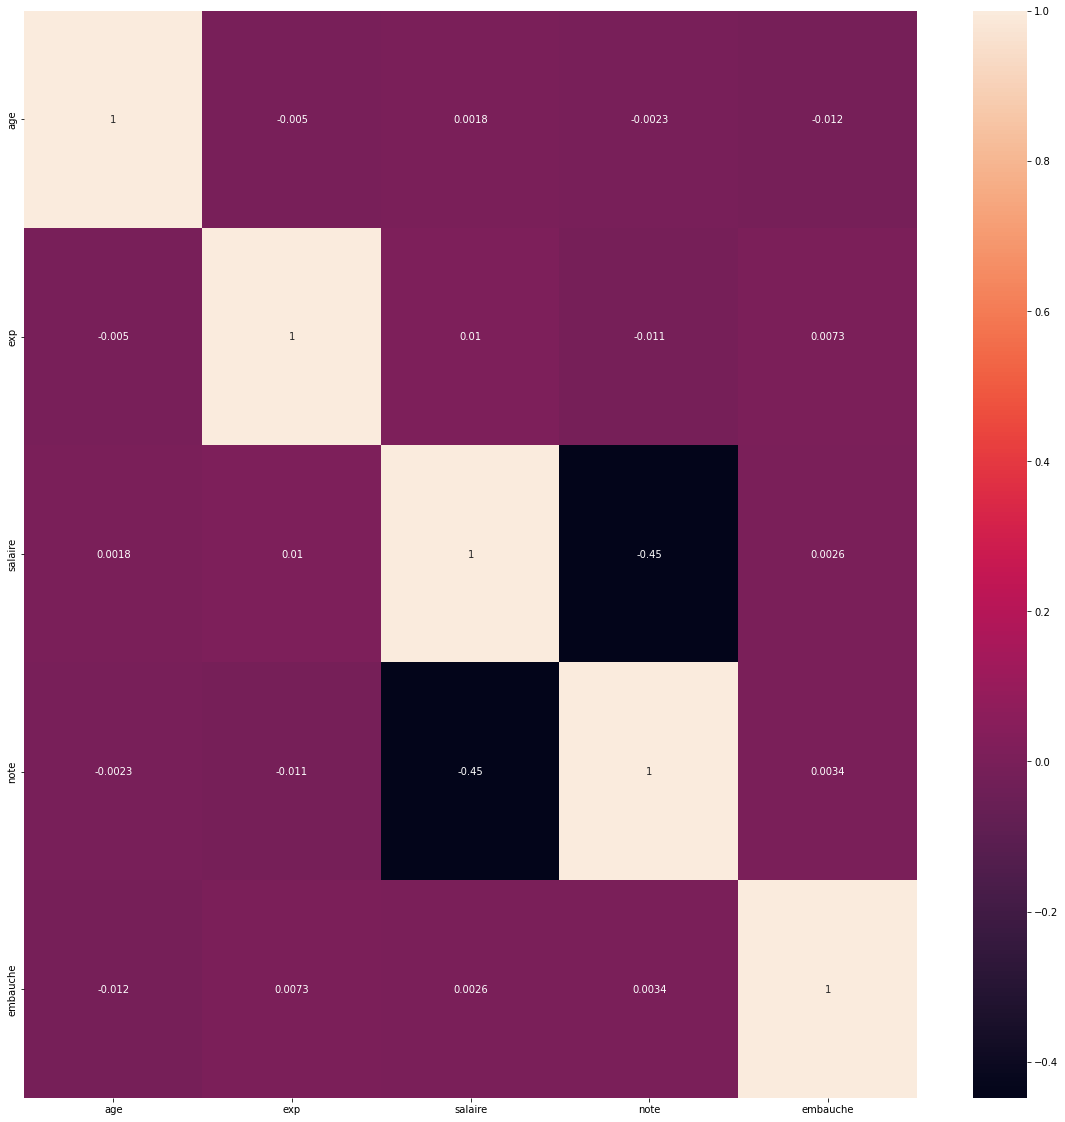

In [74]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [75]:
#On voit bien qu´il n y a aucune corrélation apparente entre ces variables

LES CORRELATIONS ENTRE LES DIFFERENTES VARIABLES

In [76]:
#Je vais d abord visualiser les chiffres de corrélation dans un tableau pour mieux les analyser en transformant en numeric les
#données catégorielles:
tab = candidat_df.copy()

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

tab.sexe = labelencoder.fit_transform(candidat_df.sexe)
tab.dispo = labelencoder.fit_transform(candidat_df.dispo)
tab.cheveux = labelencoder.fit_transform(candidat_df.cheveux)
tab.diplome = labelencoder.fit_transform(candidat_df.diplome)
tab.specialite = labelencoder.fit_transform(candidat_df.specialite)

corr = tab.drop(['embauche'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo
cheveux,1.00,0.01,0.01,0.02,-0.10,-0.07,-0.04,0.01,0.03
age,0.01,1.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,-0.01
exp,0.01,-0.01,1.00,0.01,0.00,-0.00,-0.00,-0.01,-0.00
salaire,0.02,0.00,0.01,1.00,0.13,-0.15,-0.13,-0.45,0.18
sexe,-0.10,-0.00,0.00,0.13,1.00,-0.01,0.37,-0.27,0.07
diplome,-0.07,0.00,-0.00,-0.15,-0.01,1.00,-0.04,0.21,0.16
specialite,-0.04,0.01,-0.00,-0.13,0.37,-0.04,1.00,-0.17,-0.38
note,0.01,-0.00,-0.01,-0.45,-0.27,0.21,-0.17,1.00,0.34
dispo,0.03,-0.01,-0.00,0.18,0.07,0.16,-0.38,0.34,1.00


CORRELATION ENTRE SPECIALITÉ ET SEXE

In [77]:
corr = tab[["specialite","sexe"]].corr()
corr.style.format(precision=2)

,specialite,sexe
specialite,1.00,0.37
sexe,0.37,1.00


In [78]:
#On observe une légère corrélation(0.37) entre ces 2 variables

CORRELATION ENTRE CHEVEUX ET SALAIRE

In [79]:
corr = tab[["cheveux","salaire"]].corr()
corr.style.format(precision=2)

,cheveux,salaire
cheveux,1.00,0.02
salaire,0.02,1.00


In [80]:
#On observe aucune corrélation entre ces 2 variables

CORRELATION ENTRE EXPÉRIENCE ET NOTE

In [81]:
corr = tab[["exp","note"]].corr()
corr.style.format(precision=2)

,exp,note
exp,1.00,-0.01
note,-0.01,1.00


In [82]:
#On observe aucune corrélation entre ces 2 variables

LES VARIABLES SUR LESQUELLES VA DEPENDRE LA DECISION D´EMBAUCHE

In [83]:
from sklearn.feature_selection import chi2
depends,_ = chi2(tab.drop(['embauche','date'],axis=1), tab.embauche)

print(np.array(tab.drop(['embauche','date'],axis=1).columns)[depends.argsort()])

['note' 'cheveux' 'exp' 'dispo' 'age' 'specialite' 'sexe' 'diplome'
 'salaire']


# Séparation de Features avec Y

In [86]:
candidat_df.columns

Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

In [87]:
X = candidat_df.iloc[:, 0:10]
X.head(2)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non


In [88]:
y = candidat_df.iloc[:, 10]
y.head(2)

0    0
1    0
Name: embauche, dtype: int64

# Encodage et normalisation

In [89]:
#Avant de faire le labelencoding, je redinis ceci pour réduire la variance de ces 3 variables:
X['age'] = pd.cut(x=X['age'], bins=[17, 30, 45, 65, 75],labels=[1,2,3,4])
X['exp'] = pd.cut(x=X['exp'], bins=[-1, 5, 10, 23],labels=[1,2,3])
X['salaire'] = pd.cut(x=X['salaire'], bins=range(14000,64000,10000),labels=[1,2,3,4])
#Je profite pour n utiliser la date que en mois
X['date'] = X.date.dt.month


In [90]:
X.head(5)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,6,roux,1,2,2,F,licence,geologie,97.08,non
1,4,blond,2,3,3,M,licence,forage,63.86,non
2,9,blond,1,3,3,M,licence,geologie,78.50,non
4,8,roux,2,2,2,F,licence,detective,81.91,non
5,2,chatain,2,2,3,M,master,geologie,63.46,non


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

column_trans = ColumnTransformer(
    [('ohe', OneHotEncoder(dtype='int'), ['sexe', 'dispo', 'cheveux', 'diplome', 'specialite']),
    ("normalisation", MinMaxScaler(), ["age", "exp", 'salaire', 'note' ] )], #pour normaliser 
          remainder='passthrough')

In [131]:
X_scaled = column_trans.fit_transform(X) #X.drop(["date"], axis=1))

In [132]:
X_scaled

array([[ 1.        ,  0.        ,  1.        , ...,  0.33333333,
         0.65705366,  6.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.66666667,
         0.41013825,  4.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.66666667,
         0.51895347,  9.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.33333333,
         0.70462316,  9.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.66666667,
         0.48067489, 12.        ],
       [ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.27456519, 11.        ]])

In [133]:
X_scaled.shape, type(X_scaled)

((19021, 21), numpy.ndarray)

# Division de training base avec Test

In [98]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_teste, y_train, y_teste = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)


In [135]:
X_train.shape, y_train.shape, X_teste.shape, y_teste.shape

((14265, 21), (14265,), (4756, 21), (4756,))

# Garder les variables

In [102]:
#Je garde les variables de train et test au cas ou j aurai perdu le dataset pour ne plus repeter tout le code ci haut
import pickle

In [136]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_teste, y_teste], f)

# 2. MODEL

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_train, y_train, X_teste, y_teste = pickle.load(f)

In [167]:
random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0,  max_depth=20, class_weight='balanced')
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, n_estimators=40, random_state=0)

In [168]:
predictions = random_forest.predict(X_teste)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [169]:
y_teste

9646     0
9655     0
16465    0
10957    0
4505     0
        ..
8628     0
642      0
4287     1
9883     0
7896     0
Name: embauche, Length: 4756, dtype: int64

In [170]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, predictions)

0.9043313708999159

0.9043313708999159

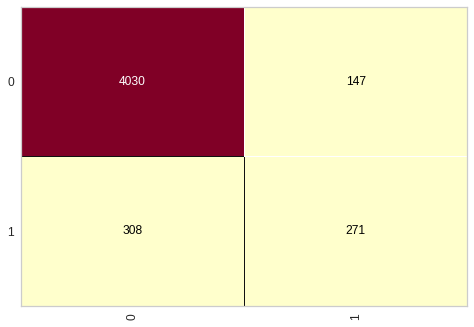

In [171]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_teste, y_teste)

In [172]:
print(classification_report(y_teste, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4177
           1       0.65      0.47      0.54       579

    accuracy                           0.90      4756
   macro avg       0.79      0.72      0.75      4756
weighted avg       0.89      0.90      0.90      4756



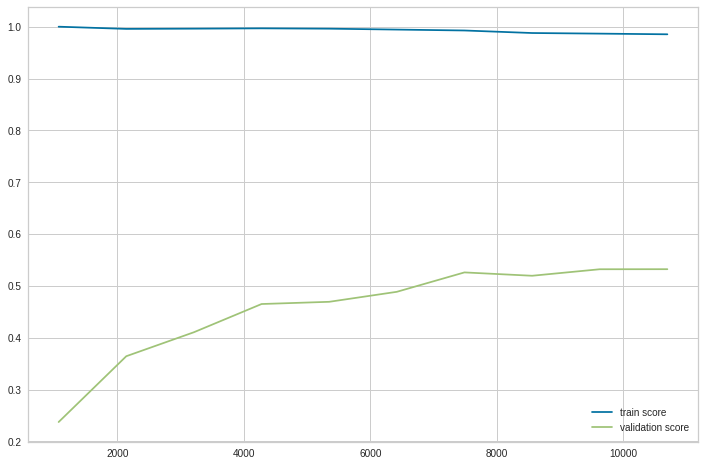

In [173]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(random_forest, X_train, y_train,
                                          cv=4, scoring='f1',
                                            train_sizes=np.linspace(0.1, 1, 10))


plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## Les variables les plus significatives du modele

In [124]:
from sklearn.feature_selection import SelectFromModel

In [174]:
selector = SelectFromModel(random_forest, threshold='mean')
selector.fit(X_train, y_train)

np.array(pd.DataFrame(X_train).columns)[selector.get_support()]

array([17, 18, 19, 20])

In [129]:
#Les variabales les plus singificatives sont: date, cheveux, note, salaire

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.5,0.666667,0.444552
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333,0.5,0.333333,0.507433
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333,1.0,0.666667,0.606957
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.666667,0.368961
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.666667,0.362717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.666667,0.262227
14261,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.0,0.666667,0.548461
14262,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.000000,0.370522
14263,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.5,0.333333,0.667682


# Sauvegarder mon modele

In [175]:
with open('credit.pkl', 'rb') as f:  
  X_train, y_train, X_teste, y_teste = pickle.load(f)

In [176]:
X_candidat = np.concatenate((X_train, X_teste), axis = 0)
y_candidat = np.concatenate((y_train, y_teste), axis = 0)

In [177]:
X_candidat.shape, y_candidat.shape

((19021, 21), (19021,))

In [178]:
random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0,  max_depth=20, class_weight='balanced')
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, n_estimators=40, random_state=0)

In [179]:
import pickle
pickle.dump(random_forest, open('random_forest_candidat.sav', 'wb'))

# Essayer mon modele sauvegardé

In [186]:
random_forest_candidat = pickle.load(open('random_forest_candidat.sav', 'rb'))
new_registre = X_candidat[1999]
new_registre

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.66666667, 0.66024974,
       4.        ])

In [187]:
new_registre.shape

(21,)

In [188]:
new_registre = new_registre.reshape(1, -1)
new_registre.shape

(1, 21)

In [189]:
new_registre

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.66666667, 0.66024974,
        4.        ]])

In [190]:
random_forest_candidat.predict(new_registre)

array([0])

# Futures améliorations a faire lors de ma présentation

## Essayer 2 autres algos CNN, SVM ou KNN

In [ ]:
# Plus rapide vu que j ai déjà ma base traitée (X_scaled), j ai que à le passer au modéle

## Tuning des paramétres avec GridSearch

In [ ]:
#Faire le tuning de paramétres avec GridSearch en vu de trouver le meilleur modele entre eux avec les meilleurs parametres

## ou la Validation croisée

In [ ]:
#Toujours dans le but de trouver le meilleur modéle

## Teste de normalité de mes résultats

In [ ]:
# Pour avoir assurance totale sur mes résultats, j´aimerai proceder a certains testes tels que Shapiro, teste d´hypothése avec Anova ou Tukey

## Et enfin faire de la Combinaison ou rejection de modéles

## Unsampling et oversampling

In [ ]:
#Essayer de résoudre le problème de dataset unbalanced avec oversampling et unsampling